# Hennepin County SNAP Program Raw Code  
### - Data Prepration  
- Measure the SNAP performance by coverage rate
- Calculate eligible population using 3 thresholds (below 130 poverty line, below 165 poverty line and adjusted below poverty line)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [129]:
# Load datasets
os.chdir(r'C:\Users\sherr\Sherry\Carlson\Courses\6130 Introduction to BA in R-Mochen Yang\Live Case\Data')
total_pop=pd.read_excel('total_data.xlsx',sheet_name='population2018,2019')
total_pvt=pd.read_excel('total_data.xlsx',sheet_name='poverty2018,2019')
summary_0=pd.read_excel('total_data.xlsx',sheet_name='Summary2016-2019',parse_dates=[0])
poverty=pd.read_excel('total_data.xlsx',sheet_name='track_poverty2018')
population=pd.read_excel('total_data.xlsx',sheet_name='track_pop2018')
summary=summary_0[summary_0['elig_month']=='2018-12-01']
county_pvt_0=pd.read_csv('Poverty_percentage_count_by_tract.csv')
t_pop=population[population['Race_Ethnicity']=='Total Population'].groupby('GEOID').sum()['Estimates'].reset_index().rename(columns={'Estimates':'TotalPopulation'})
t_pop['GEOID']=t_pop['GEOID'].astype(str)
poverty_2=poverty[poverty['Race_Ethnicity']=='Total Population'].groupby('GEOID').sum().reset_index()
poverty_2['GEOID']=poverty_2['GEOID'].astype(str)
county_pvt_0['GEOID']=county_pvt_0['GEOID'].astype(str)
county_pvt=county_pvt_0.merge(poverty_2,on='GEOID',how='left')[['GEOID','50%','Below_Poverty_Count','125%','150%','185%']]
county_pvt[county_pvt['Below_Poverty_Count']<county_pvt['50%']].shape[0]/county_pvt.shape[0]
os.chdir(r'C:\Users\sherr\Sherry\Carlson\Courses\6130 Introduction to BA in R-Mochen Yang\Live Case\Data')
pop_16=pd.read_csv('2016 Pop Data.csv')
pop_16=pop_16.rename(columns={'GEO_ID':'GEOID','Total population':'TotalPopulation'})
pop_17=pd.read_csv('2017 Pop Data.csv')
pop_17=pop_17.rename(columns={'GEO_ID':'GEOID','Total population':'TotalPopulation'})
pvt_16=pd.read_csv('16 percent poverty.csv')
pvt_17=pd.read_csv('17 percent poverty.csv')
pvt_16=pvt_16[['GEO_ID','50 percent of poverty level','125 percent of poverty level','150 percent of poverty level','185 percent of poverty level']]
pvt_16=pvt_16.rename(columns={'GEO_ID':'GEOID','50 percent of poverty level':'50%','125 percent of poverty level':'125%',
                              '150 percent of poverty level':'150%','185 percent of poverty level':'185%'})
pvt_17=pvt_17[['GEO_ID','50 percent of poverty level','125 percent of poverty level','150 percent of poverty level','185 percent of poverty level']]
pvt_17=pvt_17.rename(columns={'GEO_ID':'GEOID','50 percent of poverty level':'50%','125 percent of poverty level':'125%',
                              '150 percent of poverty level':'150%','185 percent of poverty level':'185%'})
pvt=county_pvt_0[['GEOID','50%','125%','150%','185%']]  
rename_dic={'people':'BenefitReciverCount',
                   'Below_Poverty_Count_x':'RaceBelowPovertyCount',
                   'Estimates':'RacePopulation',
                   'Below_Poverty_Count_y':'TrackBelowPovertyCount',
                   'below_130_count':'TractBelow130Count',
                   'TotalPopulation':'TractTotalPopulation',
                   'Below_poverty_pct':'TractBelowPovertyPct',
                   'Below_130poverty_pct':'TractBelow130Pct',
                   'Below_165poverty_pct':'TractBelow165Pct',
                   'Below_138poverty_pct':'TractBelow138Pct'}

## Methodology of calculating eligible population(use 130% poverty line as an example)

#### Coverage Rate Formula:

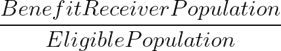

**Methodology description**
- We got income distribution data from Census Data which gave us the population of below 50%,below 125%,below 130%,below 150% and below 185% poverty line. I used this data to calculate the population of below 130% poverty line. 
- Income distributions for most of the tracts are uniformly distributed(refer to the chart below), therefore, I used interpolation method to calculate the population below 130% poverty line  

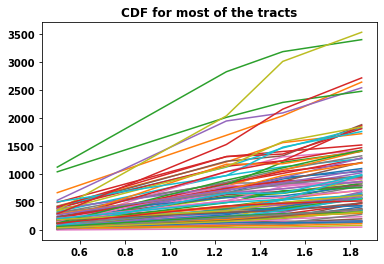

In [106]:
pvt=county_pvt_0[['GEOID','50%','125%','150%','185%']]  
for i in range(100):
    plt.plot([0.5,1.25,1.5,1.85],pvt.iloc[i,1:])
plt.title('CDF for most of the tracts')
plt.show()

- After getting the eligible population for each tract, I next calculated eligible population by race, I got the income distribution of Asian, Black, White and Hispanic across US,then compared the CDF slope of race with the CDF slope of the total population and applied delta slope on calculating below 130% poverty population of each race in each tract  

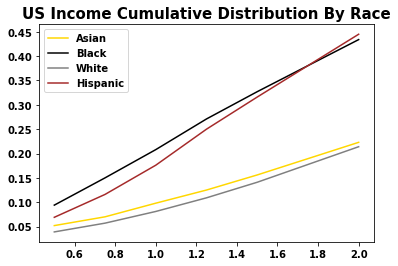

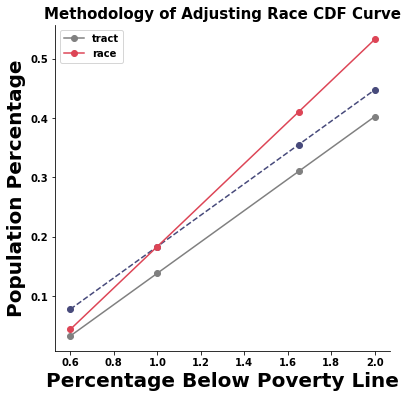

In [107]:
index=[0.5,0.75,1,1.25,1.5,2]
Asian=[0.052,0.07,0.098,0.125,0.156,0.223]
Black=[0.094,0.15,0.208,0.271,0.327,0.434]
White=[0.039,0.057,0.081,0.109,0.141,0.214]
Hispanic=[0.069,0.116,0.176,0.25,0.316,0.445]
plt.plot(index,Asian,label='Asian',color='Gold')
plt.plot(index,Black,label='Black',color='Black')
plt.plot(index,White,label='White',color='gray')
plt.plot(index,Hispanic,label='Hispanic',color='brown')
plt.title('US Income Cumulative Distribution By Race',fontsize=15)
plt.legend()
plt.show()
fig,ax=plt.subplots(figsize=[6,6])
tract=[0.138524-0.4*0.264,0.138524,0.310118,0.310118+0.35*0.264]
race_1=[0.183564-0.4*0.264,0.183564,0.264*0.65+0.183564,0.264*1+0.183564]
race_2=[0.183564-0.4*0.3489,0.183564,0.3489*0.65+0.183564,0.3489*1+0.183564]
plt.plot([0.6,1,1.65,2],tract,marker='o',label='tract',color='gray')
plt.plot([0.6,1,1.65,2],race_1,"--" ,marker='o',color='#474A7B')
plt.plot([0.6,1,1.65,2],race_2,marker='o',label='race',color='#DD4556')
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
plt.legend()
#plt.annotate('upword shift', xy=(1.35, 0.3), xytext=(1.4, 0.25),arrowprops=dict(facecolor='black', shrink=0.1))
plt.title('Methodology of Adjusting Race CDF Curve',fontsize=15)
plt.xlabel('Percentage Below Poverty Line',fontsize=20)
plt.ylabel('Population Percentage',fontsize=20)
plt.savefig('adjuste.png',transparent=True,bbox_inches='tight')

In [108]:
slope_indian=(0.434-0.208)/(2-1)
slope_asia=(0.223-0.098)/(2-1)
slope_black=(0.434-0.208)/(2-1)
slope_white=(0.214-0.081)/(2-1)
slope_hispanic=(0.445-0.176)/(2-1)
slope_all=(0.289-0.118)/(2-1)
delta_slope_indian=slope_indian/slope_all-1
delta_slope_asia=slope_asia/slope_all-1
delta_slope_black=slope_black/slope_all-1
delta_slope_white=slope_white/slope_all-1
delta_slope_hispanic=slope_hispanic/slope_all-1

## Lower Bound Data(Below 130% Poverty Line)

In [109]:
def Below130Count(df):  
    below_130_count=[]
    for i in range(df.shape[0]):
        x=np.array([1.25,1.50])
        y=list(df.iloc[i,5:7].values)/df.iloc[i,1]
        f1 = np.polyfit(x, y, 2)
        p1 = np.poly1d(f1)
        yvals = p1(1.3)*df.iloc[i,1]
        below_130_count.append(yvals)
    return below_130_count

1. Calculate the coverage rate by time

2016-12-01
Total Population is: 1209265
Total Below 130 is: 80856.0
Average Participation Rate is: 0.4188469151169788
Percentage>1: 0.010033444816053512
**************************************************
2017-12-01
Total Population is: 1224763
Total Below 130 is: 75778.0
Average Participation Rate is: 0.40212920274029257
Percentage>1: 0.023411371237458192
**************************************************
2018-12-01
Total Population is: 1235478
Total Below 130 is: 72573.0
Average Participation Rate is: 0.3986008551242534
Percentage>1: 0.030100334448160536
**************************************************


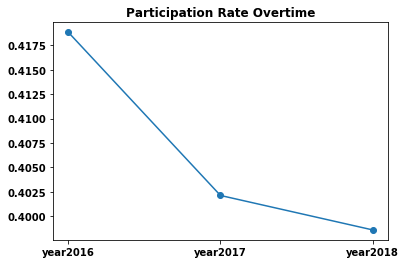

In [110]:
# Show Coverage rate (lower bound) by year
os.chdir(r'C:\Users\sherr\Sherry\Carlson\Courses\6130 Introduction to BA in R-Mochen Yang\Live Case\Data\data1203')
period=['2016-12-01','2017-12-01','2018-12-01']
time_series={}
for i in period:
    print(i)
    if i[:4]=='2016':
        pvt=pvt_16
        pop=pop_16[['GEOID','TotalPopulation']]   
    elif i[:4]=='2017':
        pvt=pvt_17
        pop=pop_17[['GEOID','TotalPopulation']]   
    elif i[:4]=='2018':
        pvt=county_pvt_0[['GEOID','50%','125%','150%','185%']]    
        pop=population[population['Race_Ethnicity']=='Total Population'].groupby('GEOID').sum()['Estimates'].reset_index().rename(columns={'Estimates':'TotalPopulation'})
    pvt['GEOID']=pvt['GEOID'].astype(str)
    pop['GEOID']=pop['GEOID'].astype(str)
    summary_gp=summary_0[summary_0['elig_month']==i].groupby(['tract']).sum()['people'].reset_index()
    summary_gp['tract']=summary_gp['tract'].astype(str)
    df=pd.merge(pop,summary_gp,left_on='GEOID',right_on='tract',how='left').merge(pvt,left_on='GEOID',right_on='GEOID')
    df['130%']=Below130Count(df)
    df['ParticipationRate']=df['people']/df['130%']
    avg_participate_rate=df['people'].sum()/df['130%'].sum()
    time_series['year'+i[:4]]= avg_participate_rate
    print('Total Population is:',df['TotalPopulation'].sum())
    print('Total Below 130 is:',df['people'].sum())
    print('Average Participation Rate is:',avg_participate_rate)
    print('Percentage>1:',df[df['ParticipationRate']>1].shape[0]/df.shape[0])
    print("*"*50)
    df=df[['GEOID','TotalPopulation','ParticipationRate','people','50%','125%','130%','150%','185%']].sort_values("ParticipationRate",ascending=False)
    if i =='2018-12-01':
        tract=df.copy()
    df.to_csv('low_ParticipationRate_'+i[:4]+'.csv')
plt.plot(range(3),list(time_series.values()),marker='o')
plt.xticks(range(3),time_series.keys())
plt.title('Participation Rate Overtime')
plt.show()

1. Calculate the coverage rate by tract

In [111]:
# Coverage Rate By Tract
def Below130Count(df):  ## Using Interporation Regression
    below_130_count=[]
    for i in range(df.shape[0]):
        x=np.array([1.25,1.5])
        y=np.array(df.iloc[i,0:][3:5].values/t_pop[t_pop['GEOID']==df.iloc[i,0]]['TotalPopulation'].item()).astype(float)
        f1 = np.polyfit(x, y, 2)
        p1 = np.poly1d(f1)
        yvals = p1(1.3)*df.iloc[i,6]
        below_130_count.append(yvals)
    return below_130_count
summary['year']=[i.year for i in summary['elig_month']]
summary_gp=summary.groupby(['tract']).sum()['people'].reset_index()
summary_gp.index=summary_gp['tract']

pop=population[population['Race_Ethnicity']=='Total Population'].groupby('GEOID').sum()['Estimates']
df=pd.merge(summary_gp[['people']],pop,left_index=True,right_index=True,how='outer')
county_pvt.index=county_pvt['GEOID'].astype(str)
df.index=df.index.astype(str)
df_all=county_pvt.merge(pd.DataFrame(df[['Estimates','people']]),left_index=True,right_index=True)
df_all['below_130_count']=Below130Count(df_all)  
df_all['Penetration']=df_all['people']/df_all['below_130_count']
df=df_all.copy()
df['below_150_count']=df['Estimates']*(df['150%']/df['Estimates'])
df['below_185_count']=df['Estimates']*(df['185%']/df['Estimates'])
total=df.sort_values('Penetration',ascending=False)
print(df.shape[0],'rows')

penetration=df['people'].sum()/df['below_130_count'].sum()
print('Average penetration is',round(penetration,6))
total.to_csv('total.csv')
t_pop=total[['GEOID','Below_Poverty_Count','below_130_count','Estimates']].rename(columns={'Estimates':'TotalPopulation'})
t_pop['Below_poverty_pct']=t_pop['Below_Poverty_Count']/t_pop['TotalPopulation']
t_pop['Below_130poverty_pct']=t_pop['below_130_count']/t_pop['TotalPopulation']
check=df.copy()
t_pop.index=t_pop.index.astype('int64')

299 rows
Average penetration is 0.398601


2. Calculate coverage rate by race

In [112]:
# American Indian and Alaska Adjusted by Race Income Distribution
participation={}
participation_adjusted={}

summary_eth='American Indian or Alaskan Native'
pop_eth='American Indian and Alaska Native Alone'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow130Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_indian)
df['RaceBelow130Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
df['RaceBelow130Count']=df['RaceBelow130Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow130Count']
df.fillna(0,inplace=True)
df=df[['tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow130Count','RaceBelow130Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2]
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('low_Indian.csv')
AvgRate_AIA=df['BenefitReciverCount'].sum()/df['RaceBelow130Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 130 poverty are',df['RaceBelow130Count'].sum())
print('Participation Rate is',round(AvgRate_AIA,3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['AmericanIndian&Alaska']=AvgRate_AIA
aia=df.copy()
aia.head()

176 tracts, droped 123 tracts with less than 0.2 mean of population
Total participants are 1245.0
Total below 130 poverty are 3086.0200888350864
Participation Rate is 0.403
track participateion rate >1 is 0.17


,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow130Count,RaceBelow130Pct,RacePopulation
36479,27053109300,American Indian or Alaskan Native,16.737014,10.0,0,0.597478,0.049790,12
36259,27053100200,American Indian or Alaskan Native,15.020837,32.0,0,2.130374,0.047342,45
35706,27053009500,American Indian or Alaskan Native,13.074578,18.0,0,1.376718,0.072459,19
36553,27053125800,American Indian or Alaskan Native,11.594860,39.0,0,3.363559,0.124576,27
35615,27053000102,American Indian or Alaskan Native,11.559206,11.0,0,0.951622,0.079302,12


In [46]:
# Black or African American Alone Adjusted by Race Income Distribution
summary_eth='Black/African American'
pop_eth='Black or African American Alone'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow130Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_indian)
df['RaceBelow130Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
df['RaceBelow130Count']=df['RaceBelow130Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow130Count']
df.fillna(0,inplace=True)
df=df[['tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow130Count','RaceBelow130Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2]
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('low_Black.csv')

AvgRate_BA=df['BenefitReciverCount'].sum()/df['RaceBelow130Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 130 poverty are',df['RaceBelow130Count'].sum())
print('Participation Rate is',round(AvgRate_BA,3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation['Black&AfricanAmerican']=AvgRate_BA
participation_adjusted['Black&AfricanAmerican']=AvgRate_BA
ba=df.copy()
ba.head()

225 tracts, droped 81 tracts with less than 0.2 mean of population
Total participants are 39994.0
Total below 130 poverty are 62520.62130028222
Participation Rate is 0.64
track participateion rate >1 is 0.36


,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow130Count,RaceBelow130Pct,RacePopulation
36031,27053025906,Black/African American,148.701992,122.0,0.0,0.820433,0.005362,153.0
36531,27053111500,Black/African American,131.218709,66.0,0.0,0.502977,0.002045,246.0
36150,27053026713,Black/African American,45.722069,17.0,0.0,0.371812,0.002021,184.0
36529,27053111400,Black/African American,34.514924,43.0,0.0,1.245838,0.007597,164.0
36049,27053026015,Black/African American,16.190840,45.0,0.0,2.779349,0.013362,208.0


In [47]:
#Hispanic or Latino Adjusted by Race Income Distribution
summary_eth='Hispanic or Latino'
pop_eth='Hispanic or Latino'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow130Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_indian)
df['RaceBelow130Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
df['RaceBelow130Count']=df['RaceBelow130Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow130Count']
df.fillna(0,inplace=True)
df=df[['tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow130Count','RaceBelow130Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2]
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('low_Hispanic.csv')

AvgRate_HL=df['BenefitReciverCount'].sum()/df['RaceBelow130Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 130 poverty are',df['RaceBelow130Count'].sum())
print('Participation Rate is',round(df['BenefitReciverCount'].sum()/df['RaceBelow130Count'].sum(),3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['Hispanic*Latino']=AvgRate_HL
hl=df.copy()
hl.head()

249 tracts, droped 50 tracts with less than 0.2 mean of population
Total participants are 4286.0
Total below 130 poverty are 22394.089559145898
Participation Rate is 0.191
track participateion rate >1 is 0.112


,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow130Count,RaceBelow130Pct,RacePopulation
36532,27053111500,Hispanic or Latino,28.490558,12.0,0,0.421192,0.002045,206
35929,27053024200,Hispanic or Latino,18.526080,18.0,0,0.971603,0.013310,73
35940,27053024500,Hispanic or Latino,6.066813,18.0,0,2.966961,0.031563,94
35877,27053022400,Hispanic or Latino,4.752470,16.0,0,3.366670,0.054301,62
36080,27053026207,Hispanic or Latino,4.634590,14.0,0,3.020763,0.040821,74


In [48]:
#White Adjusted by Race Income Distribution
summary_eth='White'
pop_eth='White Alone, Not Hispanic or Latino'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow130Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_indian)
df['RaceBelow130Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
df['RaceBelow130Count']=df['RaceBelow130Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow130Count']
df.fillna(0,inplace=True)
df=df[['tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow130Count','RaceBelow130Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2]
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('low_White.csv')
AvgRate_W=df['BenefitReciverCount'].sum()/df['RaceBelow130Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 130 poverty are',df['RaceBelow130Count'].sum())
print('Participation Rate is',round(df['BenefitReciverCount'].sum()/df['RaceBelow130Count'].sum(),3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['White']=AvgRate_W
white=df.copy()
white.head()

282 tracts, droped 18 tracts with less than 0.2 mean of population
Total participants are 16988.0
Total below 130 poverty are 86408.74577945806
Participation Rate is 0.197
track participateion rate >1 is 0.0


,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow130Count,RaceBelow130Pct,RacePopulation
36449,27053107400,White,0.881515,60.0,45.0,68.064644,0.074551,913.0
36290,27053100900,White,0.768145,135.0,78.0,175.747985,0.185977,945.0
36461,27053108600,White,0.680523,73.0,35.0,107.270367,0.095692,1121.0
36034,27053025906,White,0.630990,109.0,149.0,172.744292,0.039012,4428.0
36533,27053111500,White,0.621532,42.0,58.0,67.574966,0.014430,4683.0


In [49]:
#Asian/Pacific Islander Adjusted by Race Income Distribution
summary_eth='Asian/Pacific Islander'
pov_eth='Asian Alone'
pov_eth_2='Native Hawaiian and Other Pacific Islander Alone'

summary_eth='Asian/Pacific Islander'
pov_eth='Asian Alone'
pov_eth_2='Native Hawaiian and Other Pacific Islander Alone'

pvt=poverty[(poverty['Race_Ethnicity']==pov_eth)|(poverty['Race_Ethnicity']==pov_eth_2)].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[(population['Race_Ethnicity']==pov_eth)|(population['Race_Ethnicity']==pov_eth_2)].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)
df['TrackSlope']=(df['TractBelow130Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_indian)
df['RaceBelow130Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
df['RaceBelow130Count']=df['RaceBelow130Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow130Count']
df.fillna(0,inplace=True)
df=df[['tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow130Count','RaceBelow130Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2]
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('low_Asia.csv')
AvgRate_AP=df['BenefitReciverCount'].sum()/df['RaceBelow130Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 130 poverty are',df['RaceBelow130Count'].sum())
print('Participation Rate is',round(df['BenefitReciverCount'].sum()/df['RaceBelow130Count'].sum(),3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['Asian&PacificIslander']=AvgRate_AP
asia=df.copy()
asia.head()

240 tracts, droped 59 tracts with less than 0.2 mean of population
Total participants are 5242.0
Total below 130 poverty are 13154.520030627416
Participation Rate is 0.398
track participateion rate >1 is 0.15


,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow130Count,RaceBelow130Pct,RacePopulation
36030,27053025906,Asian/Pacific Islander,10.310575,23.0,0,2.230719,0.005362,416
36009,27053025701,Asian/Pacific Islander,8.965430,18.0,0,2.007712,0.017767,113
36228,27053026908,Asian/Pacific Islander,6.704531,12.0,0,1.789834,0.009226,194
36497,27053110000,Asian/Pacific Islander,5.796187,11.0,0,1.897799,0.020406,93
36334,27053102500,Asian/Pacific Islander,5.350008,19.0,0,3.551397,0.049325,72


In [51]:
participation_adjusted

{'AmericanIndian&Alaska': 0.4034322409320296,
 'Black&AfricanAmerican': 0.6396929391969984,
 'Hispanic*Latino': 0.19138978562535794,
 'White': 0.1966004696255938,
 'Asian&PacificIslander': 0.3984942048660956}

<BarContainer object of 5 artists>

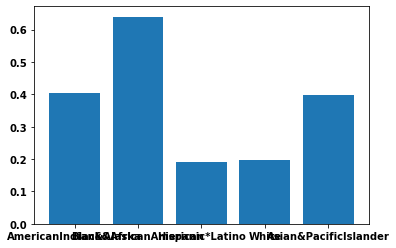

In [57]:
plt.bar(participation_adjusted.keys(),participation_adjusted.values())

## Upper Bound Data(Below 165% Poverty Line)

1. Calculate coverage rate by time

2016-12-01
Total Population is: 1209265
Total Below 165 is: 80856.0
Total Participants is: 249633.57548183107
Average Participation Rate is: 0.3238987377556706
Percentage>1: 0.0
**************************************************
2017-12-01
Total Population is: 1224763
Total Below 165 is: 75778.0
Total Participants is: 243690.10173118365
Average Participation Rate is: 0.310960516909264
Percentage>1: 0.0033444816053511705
**************************************************
2018-12-01
Total Population is: 1235478
Total Below 165 is: 72573.0
Total Participants is: 236777.40393619318
Average Participation Rate is: 0.3065030648767354
Percentage>1: 0.006688963210702341
**************************************************


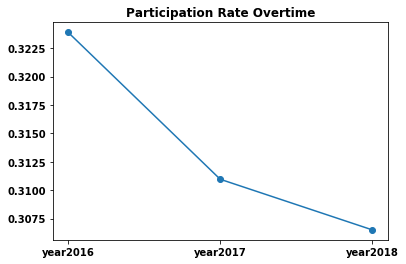

In [63]:
# Show Coverage rate (lower bound) by year
os.chdir(r'C:\Users\sherr\Sherry\Carlson\Courses\6130 Introduction to BA in R-Mochen Yang\Live Case\Data\data1203')
def Below165Count(df):  ## Using Interporation Regression
    below_165_count=[]
    for i in range(df.shape[0]):
        x=np.array([1.5,1.85])
        y=list(df.iloc[i,6:8].values)/df.iloc[i,1]
        f1 = np.polyfit(x, y, 2)
        p1 = np.poly1d(f1)
        yvals = p1(1.65)*df.iloc[i,1]
        below_165_count.append(yvals)
    return below_165_count
period=['2016-12-01','2017-12-01','2018-12-01']
time_series={}
for i in period:
    print(i)
    if i[:4]=='2016':
        pvt=pvt_16
        pop=pop_16[['GEOID','TotalPopulation']]   
    elif i[:4]=='2017':
        pvt=pvt_17
        pop=pop_17[['GEOID','TotalPopulation']]   
    elif i[:4]=='2018':
        pvt=county_pvt_0[['GEOID','50%','125%','150%','185%']]    
        pop=population[population['Race_Ethnicity']=='Total Population'].groupby('GEOID').sum()['Estimates'].reset_index().rename(columns={'Estimates':'TotalPopulation'})
    pvt['GEOID']=pvt['GEOID'].astype(str)
    pop['GEOID']=pop['GEOID'].astype(str)
    summary_gp=summary_0[summary_0['elig_month']==i].groupby(['tract']).sum()['people'].reset_index()
    summary_gp['tract']=summary_gp['tract'].astype(str)
    df=pd.merge(pop,summary_gp,left_on='GEOID',right_on='tract',how='left').merge(pvt,left_on='GEOID',right_on='GEOID')
    df['165%']=Below165Count(df)
    df['ParticipationRate']=df['people']/df['165%']
    avg_participate_rate=df['people'].sum()/df['165%'].sum()
    time_series['year'+i[:4]]= avg_participate_rate
    print('Total Population is:',df['TotalPopulation'].sum())
    print('Total Below 165 is:',df['people'].sum())
    print('Total Participants is:',df['165%'].sum())    
    print('Average Participation Rate is:',avg_participate_rate)
    print('Percentage>1:',df[df['ParticipationRate']>1].shape[0]/df.shape[0])
    print("*"*50)
    df=df[['GEOID','TotalPopulation','ParticipationRate','people','50%','125%','150%','165%','185%']].sort_values("ParticipationRate",ascending=False)
    if i =='2018-12-01':
        tract=df.copy()
    df.to_csv('ParticipationRate_'+i[:4]+'.csv')
plt.plot(range(3),list(time_series.values()),marker='o')
plt.xticks(range(3),time_series.keys())
plt.title('Participation Rate Overtime')
plt.show()

2. Calculate coverage rate by tract

In [97]:
# Coverage Rate By Tract
def Below165Count(df):  
    below_165_count=[]
    for i in range(df.shape[0]):
        x=np.array([1.5,1.85])
        y=np.array(df.iloc[i,0:][4:6].values/t_pop[t_pop['GEOID']==df.iloc[i,0]]['TotalPopulation'].item()).astype(float)
        f1 = np.polyfit(x, y, 2)
        p1 = np.poly1d(f1)
        yvals = p1(1.65)*df.iloc[i,6]
        below_165_count.append(yvals)
    return below_165_count
summary['year']=[i.year for i in summary['elig_month']]
summary_gp=summary.groupby(['tract']).sum()['people'].reset_index()
summary_gp.index=summary_gp['tract']
pop=population[population['Race_Ethnicity']=='Total Population'].groupby('GEOID').sum()['Estimates']
df=pd.merge(summary_gp[['people']],pop,left_index=True,right_index=True,how='outer')
county_pvt.index=county_pvt['GEOID'].astype(str)
df.index=df.index.astype(str)
df_all=county_pvt.merge(pd.DataFrame(df[['Estimates','people']]),left_index=True,right_index=True)
df_all['below_165_count']=Below165Count(df_all)  
df_all['Penetration']=df_all['people']/df_all['below_165_count']
df=df_all.copy()
df['below_150_count']=df['Estimates']*(df['150%']/df['Estimates'])
df['below_185_count']=df['Estimates']*(df['185%']/df['Estimates'])
total=df.sort_values('Penetration',ascending=False)
print(df.shape[0],'rows')
print('There are {} records that are beyond 150,185 range'.format(df[(df['below_165_count']<df['below_150_count'])&(df['below_165_count']>df['below_185_count'])].shape[0]))
print('There are {} records that are larger total population'.format(df[df['below_165_count']>df['Estimates']].shape[0]))
print('There are {} records whose penetration larger than 1'.format(df[df['Penetration']>1].shape[0]))
print('There are {} records whose penetration larger than 1'.format(str(round((df[df['Penetration']>1].shape[0]/df.shape[0])*100,2))+'%'))
penetration=df['people'].sum()/df['below_165_count'].sum()
print('Average penetration is',round(penetration,6))
total.to_csv('total.csv')
t_pop=total[['GEOID','Below_Poverty_Count','below_165_count','Estimates']].rename(columns={'Estimates':'TotalPopulation'})
t_pop['Below_poverty_pct']=t_pop['Below_Poverty_Count']/t_pop['TotalPopulation']
t_pop['Below_165poverty_pct']=t_pop['below_165_count']/t_pop['TotalPopulation']
check=df.copy()
t_pop.index=t_pop.index.astype('int64')

299 rows
There are 0 records that are beyond 150,185 range
There are 0 records that are larger total population
There are 2 records whose penetration larger than 1
There are 0.67% records whose penetration larger than 1
Average penetration is 0.306503


2. Calculate coverage rate by race

In [69]:
# American Indian and Alaska Adjusted by Race Income Distribution
participation={}
participation_adjusted={}

summary_eth='American Indian or Alaskan Native'
pop_eth='American Indian and Alaska Native Alone'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow165Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_indian)
df['RaceBelow165Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
df['RaceBelow165Count']=df['RaceBelow165Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow165Count']
df.fillna(0,inplace=True)
df=df[['tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow165Count','RaceBelow165Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2]
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('Indian.csv')
AvgRate_AIA=df['BenefitReciverCount'].sum()/df['RaceBelow165Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 165 poverty are',df['RaceBelow165Count'].sum())
print('Participation Rate is',round(AvgRate_AIA,3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['AmericanIndian&Alaska']=AvgRate_AIA
aia=df.copy()
aia.head()

176 tracts, droped 123 tracts with less than 0.2 mean of population
Total participants are 1245.0
Total below 165 poverty are 3774.4484394208657
Participation Rate is 0.33
track participateion rate >1 is 0.142


,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow165Count,RaceBelow165Pct,RacePopulation
36259,27053100200,American Indian or Alaskan Native,6.776768,32.0,0,4.722015,0.104934,45
36479,27053109300,American Indian or Alaskan Native,6.163857,10.0,0,1.622361,0.135197,12
36553,27053125800,American Indian or Alaskan Native,5.833435,39.0,0,6.685598,0.247615,27
35706,27053009500,American Indian or Alaskan Native,5.314084,18.0,0,3.387225,0.178275,19
36349,27053102900,American Indian or Alaskan Native,4.984016,10.0,0,2.006414,0.182401,11


In [70]:
# Black or African American Alone Adjusted by Race Income Distribution
summary_eth='Black/African American'
pop_eth='Black or African American Alone'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow165Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_black)
df['RaceBelow165Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
df['RaceBelow165Count']=df['RaceBelow165Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow165Count']
df.fillna(0,inplace=True)
df=df[['RaceSlope','TrackSlope','tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow165Count','RaceBelow165Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2]
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('Black.csv')

AvgRate_BA=df['BenefitReciverCount'].sum()/df['RaceBelow165Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 165 poverty are',df['RaceBelow165Count'].sum())
print('Participation Rate is',round(AvgRate_BA,3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation['Black&AfricanAmerican']=AvgRate_BA
participation_adjusted['Black&AfricanAmerican']=AvgRate_BA
ba=df.copy()
ba.head()

225 tracts, droped 81 tracts with less than 0.2 mean of population
Total participants are 39994.0
Total below 165 poverty are 76678.98785243277
Participation Rate is 0.522
track participateion rate >1 is 0.227


,RaceSlope,TrackSlope,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow165Count,RaceBelow165Pct,RacePopulation
36031,0.023056,0.017445,27053025906,Black/African American,53.207737,122.0,0.0,2.292900,0.014986,153.0
36531,0.040365,0.030542,27053111500,Black/African American,10.225535,66.0,0.0,6.454430,0.026238,246.0
36121,0.051721,0.039134,27053026611,Black/African American,8.545719,238.0,18.0,27.850201,0.095052,293.0
36112,0.098242,0.074333,27053026514,Black/African American,6.674739,52.0,0.0,7.790566,0.063857,122.0
36049,0.053500,0.040480,27053026015,Black/African American,6.221267,45.0,0.0,7.233253,0.034775,208.0


In [71]:
#Hispanic or Latino Adjusted by Race Income Distribution
summary_eth='Hispanic or Latino'
pop_eth='Hispanic or Latino'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow165Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_hispanic)
df['RaceBelow165Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
df['RaceBelow165Count']=df['RaceBelow165Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow165Count']
df.fillna(0,inplace=True)
df=df[['RaceSlope','TrackSlope','tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow165Count','RaceBelow165Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2]
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('Hispanic.csv')

AvgRate_HL=df['BenefitReciverCount'].sum()/df['RaceBelow165Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 165 poverty are',df['RaceBelow165Count'].sum())
print('Participation Rate is',round(df['BenefitReciverCount'].sum()/df['RaceBelow165Count'].sum(),3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['Hispanic*Latino']=AvgRate_HL
hl=df.copy()
hl.head()

249 tracts, droped 50 tracts with less than 0.2 mean of population
Total participants are 4286.0
Total below 165 poverty are 32197.919630770033
Participation Rate is 0.133
track participateion rate >1 is 0.044


,RaceSlope,TrackSlope,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow165Count,RaceBelow165Pct,RacePopulation
35929,0.099422,0.063201,27053024200,Hispanic or Latino,3.815536,18.0,0,4.717554,0.064624,73
35940,0.132494,0.084225,27053024500,Hispanic or Latino,2.223494,18.0,0,8.095366,0.086121,94
35877,0.182648,0.116107,27053022400,Hispanic or Latino,2.173704,16.0,0,7.360706,0.118721,62
35723,0.043192,0.027456,27053011704,Hispanic or Latino,2.035393,10.0,0,4.913056,0.028075,175
36532,0.048046,0.030542,27053111500,Hispanic or Latino,1.865294,12.0,0,6.433301,0.031230,206


In [72]:
#White Adjusted by Race Income Distribution
summary_eth='White'
pop_eth='White Alone, Not Hispanic or Latino'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow165Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_white)
df['RaceBelow165Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
# Method 2: 
#df['RaceBelow165Pct']=df['TractBelow165Pct']*(df['RaceBelowPovertyCount']/df['RacePopulation'])/df['TractBelowPovertyPct']
# Method 3:
#df['RaceBelow165Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']-df['TractBelowPovertyPct']+df['TractBelow165Pct']
df['RaceBelow165Count']=df['RaceBelow165Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow165Count']
df.fillna(0,inplace=True)
df=df[['RaceSlope','TrackSlope','tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow165Count','RaceBelow165Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2]
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('White.csv')
AvgRate_W=df['BenefitReciverCount'].sum()/df['RaceBelow165Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 165 poverty are',df['RaceBelow165Count'].sum())
print('Participation Rate is',round(df['BenefitReciverCount'].sum()/df['RaceBelow165Count'].sum(),3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['White']=AvgRate_W
white=df.copy()
white.head()

282 tracts, droped 18 tracts with less than 0.2 mean of population
Total participants are 16988.0
Total below 165 poverty are 96368.97494954888
Participation Rate is 0.176
track participateion rate >1 is 0.0


,RaceSlope,TrackSlope,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow165Count,RaceBelow165Pct,RacePopulation
36290,0.125214,0.160989,27053100900,White,0.871460,135.0,78.0,154.912458,0.163929,945.0
36461,0.100674,0.129438,27053108600,White,0.673704,73.0,35.0,108.356128,0.096660,1121.0
36405,0.129751,0.166822,27053105204,White,0.617786,271.0,320.0,438.663438,0.311772,1407.0
36034,0.013568,0.017445,27053025906,White,0.579627,109.0,149.0,188.052103,0.042469,4428.0
36449,0.099729,0.128223,27053107400,White,0.575904,60.0,45.0,104.184121,0.114112,913.0


In [73]:
#Asian/Pacific Islander Adjusted by Race Income Distribution
summary_eth='Asian/Pacific Islander'
pov_eth='Asian Alone'
pov_eth_2='Native Hawaiian and Other Pacific Islander Alone'

summary_eth='Asian/Pacific Islander'
pov_eth='Asian Alone'
pov_eth_2='Native Hawaiian and Other Pacific Islander Alone'

pvt=poverty[(poverty['Race_Ethnicity']==pov_eth)|(poverty['Race_Ethnicity']==pov_eth_2)].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[(population['Race_Ethnicity']==pov_eth)|(population['Race_Ethnicity']==pov_eth_2)].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)
df['TrackSlope']=(df['TractBelow165Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_white)
df['RaceBelow165Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
df['RaceBelow165Count']=df['RaceBelow165Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow165Count']
df.fillna(0,inplace=True)
df=df[['RaceSlope','TrackSlope','tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow165Count','RaceBelow165Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2]
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('Asia.csv')
AvgRate_AP=df['BenefitReciverCount'].sum()/df['RaceBelow165Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 165 poverty are',df['RaceBelow165Count'].sum())
print('Participation Rate is',round(df['BenefitReciverCount'].sum()/df['RaceBelow165Count'].sum(),3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['Asian&PacificIslander']=AvgRate_AP
asia=df.copy()
asia.head()

240 tracts, droped 59 tracts with less than 0.2 mean of population
Total participants are 5242.0
Total below 165 poverty are 14491.542298275288
Participation Rate is 0.362
track participateion rate >1 is 0.121


,RaceSlope,TrackSlope,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow165Count,RaceBelow165Pct,RacePopulation
36030,0.013568,0.017445,27053025906,Asian/Pacific Islander,6.268992,23.0,0,3.668852,0.008819,416
36228,0.016515,0.021233,27053026908,Asian/Pacific Islander,5.762231,12.0,0,2.082527,0.010735,194
36009,0.044381,0.057062,27053025701,Asian/Pacific Islander,5.521816,18.0,0,3.259797,0.028848,113
36497,0.050970,0.065533,27053110000,Asian/Pacific Islander,3.570120,11.0,0,3.081129,0.033130,93
35844,0.072217,0.092851,27053021505,Asian/Pacific Islander,2.277701,17.0,0,7.463668,0.046941,159


In [74]:
participation_adjusted

{'AmericanIndian&Alaska': 0.329849518408318,
 'Black&AfricanAmerican': 0.5215770463346189,
 'Hispanic*Latino': 0.13311419026911514,
 'White': 0.1762808000074045,
 'Asian&PacificIslander': 0.3617282337590718}

<BarContainer object of 5 artists>

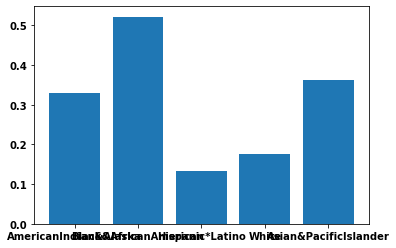

In [76]:
plt.bar(participation_adjusted.keys(),participation_adjusted.values())

## Avg Bound Data(Below 138% Poverty Line for)

1.Calculate coverage rate by time

Since the categorical and non-categorical percentage are changing overyear, I calculated differenct average threshold for each year

In [81]:
# categorical data disability & old-2016
cat_16=0.2298
non_cat_16=1-cat_16
upper=1.65
lower=1.3
avg_16=cat_16*1.65+non_cat_16*1.3
# categorical data disability & old-2017
cat_17=0.2356
non_cat_17=1-cat_17
upper=1.65
lower=1.3
avg_17=cat_17*1.65+non_cat_17*1.3
# categorical data disability & old-2018
cat_18=0.23
non_cat_18=1-cat_18
upper=1.65
lower=1.3
avg_18=cat_18*1.65+non_cat_18*1.3
# categorical data disability & old-2019
cat_19=0.2558
non_cat_19=1-cat_19
upper=1.65
lower=1.3
avg_19=cat_19*1.65+non_cat_19*1.3

In [92]:
def Below1Count16(df):  ## Using Interporation Regression
    below_165_count=[]
    for i in range(df.shape[0]):
        x=np.array([1.25,1.5])
        y=list(df.iloc[i,5:7].values)/df.iloc[i,1]
        f1 = np.polyfit(x, y, 2)
        p1 = np.poly1d(f1)
        yvals = p1(avg_16)*df.iloc[i,1]
        below_165_count.append(yvals)
    return below_165_count
def Below1Count17(df):  ## Using Interporation Regression
    below_165_count=[]
    for i in range(df.shape[0]):
        x=np.array([1.25,1.5])
        y=list(df.iloc[i,5:7].values)/df.iloc[i,1]
        f1 = np.polyfit(x, y, 2)
        p1 = np.poly1d(f1)
        yvals = p1(avg_17)*df.iloc[i,1]
        below_165_count.append(yvals)
    return below_165_count
def Below1Count18(df):  ## Using Interporation Regression
    below_165_count=[]
    for i in range(df.shape[0]):
        x=np.array([1.25,1.5])
        y=list(df.iloc[i,5:7].values)/df.iloc[i,1]
        f1 = np.polyfit(x, y, 2)
        p1 = np.poly1d(f1)
        yvals = p1(avg_18)*df.iloc[i,1]
        below_165_count.append(yvals)
    return below_165_count
def Below1Count19(df):  ## Using Interporation Regression
    below_165_count=[]
    for i in range(df.shape[0]):
        x=np.array([1.25,1.5])
        y=list(df.iloc[i,5:7].values)/df.iloc[i,1]
        f1 = np.polyfit(x, y, 2)
        p1 = np.poly1d(f1)
        yvals = p1(avg_19)*df.iloc[i,1]
        below_165_count.append(yvals)
    return below_165_count

2016-12-01

Total Population is: 1209265
Total Below 138 is: 80856.0
Total Participants is: 206011.55084359422
Average Participation Rate is: 0.3924828470486424
Percentage>1: 0.006688963210702341
**************************************************
2017-12-01
Total Population is: 1224763
Total Below 138 is: 75778.0
Total Participants is: 201267.59718238853
Average Participation Rate is: 0.376503724697076
Percentage>1: 0.013377926421404682
**************************************************
2018-12-01
Total Population is: 1235478
Total Below 138 is: 72573.0
Total Participants is: 194497.91086607135
Average Participation Rate is: 0.37312997181739804
Percentage>1: 0.020066889632107024
**************************************************


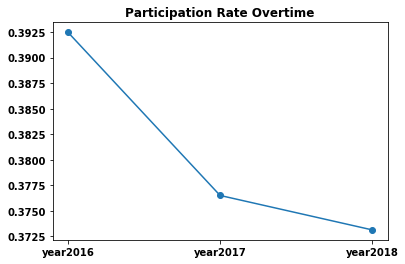

In [95]:
os.chdir(r'C:\Users\sherr\Sherry\Carlson\Courses\6130 Introduction to BA in R-Mochen Yang\Live Case\Data\data1203')
period=['2016-12-01','2017-12-01','2018-12-01']
time_series={}
for i in period:
    print(i)
    if i[:4]=='2016':
        pvt=pvt_16
        pop=pop_16[['GEOID','TotalPopulation']]   
    elif i[:4]=='2017':
        pvt=pvt_17
        pop=pop_17[['GEOID','TotalPopulation']]   
    elif i[:4]=='2018':
        pvt=county_pvt_0[['GEOID','50%','125%','150%','185%']]    
        pop=population[population['Race_Ethnicity']=='Total Population'].groupby('GEOID').sum()['Estimates'].reset_index().rename(columns={'Estimates':'TotalPopulation'})
    pvt['GEOID']=pvt['GEOID'].astype(str)
    pop['GEOID']=pop['GEOID'].astype(str)
    summary_gp=summary_0[summary_0['elig_month']==i].groupby(['tract']).sum()['people'].reset_index()
    summary_gp['tract']=summary_gp['tract'].astype(str)
    df=pd.merge(pop,summary_gp,left_on='GEOID',right_on='tract',how='left').merge(pvt,left_on='GEOID',right_on='GEOID')
    if i[:4]=='2016':
        df['138%']=Below1Count16(df)
        print()
    elif i[:4]=='2017':
        df['138%']=Below1Count17(df)
    elif i[:4]=='2018':
        df['138%']=Below1Count18(df)
    elif i[:4]=='2019':
        df['138%']=Below1Count19(df)
    df['ParticipationRate']=df['people']/df['138%']
    avg_participate_rate=df['people'].sum()/df['138%'].sum()
    time_series['year'+i[:4]]= avg_participate_rate
    print('Total Population is:',df['TotalPopulation'].sum())
    print('Total Below 138 is:',df['people'].sum())
    print('Total Participants is:',df['138%'].sum())    
    print('Average Participation Rate is:',avg_participate_rate)
    print('Percentage>1:',df[df['ParticipationRate']>1].shape[0]/df.shape[0])
    print("*"*50)
    df=df[['GEOID','TotalPopulation','ParticipationRate','people','50%','125%','138%','150%','185%']].sort_values("ParticipationRate",ascending=False)
    if i =='2018-12-01':
        tract=df.copy()
    df.to_csv('avg_ParticipationRate_'+i[:4]+'.csv')
plt.plot(range(3),list(time_series.values()),marker='o')
plt.xticks(range(3),time_series.keys())
plt.title('Participation Rate Overtime')
plt.show()

2. Calculate coverage rate by tract

In [120]:
def Below1Count18(df):  ## Using Interporation Regression
    below_138_count=[]
    for i in range(df.shape[0]):
        x=np.array([1.25,1.5])
        y=np.array(df.iloc[i,0:][3:5].values/t_pop[t_pop['GEOID']==df.iloc[i,0]]['TotalPopulation'].item()).astype(float)
        f1 = np.polyfit(x, y, 2)
        p1 = np.poly1d(f1)
        yvals = p1(avg_18)*df.iloc[i,6]
        below_138_count.append(yvals)
    return below_138_count
summary['year']=[i.year for i in summary['elig_month']]
summary_gp=summary.groupby(['tract']).sum()['people'].reset_index()
summary_gp.index=summary_gp['tract']

pop=population[population['Race_Ethnicity']=='Total Population'].groupby('GEOID').sum()['Estimates']
df=pd.merge(summary_gp[['people']],pop,left_index=True,right_index=True,how='outer')
county_pvt.index=county_pvt['GEOID'].astype(str)
df.index=df.index.astype(str)
df_all=county_pvt.merge(pd.DataFrame(df[['Estimates','people']]),left_index=True,right_index=True)
df_all['below_138_count']=Below1Count18(df_all)  
df_all['Penetration']=df_all['people']/df_all['below_138_count']
df=df_all.copy()
df['below_125_count']=df['Estimates']*(df['125%']/df['Estimates'])
df['below_150_count']=df['Estimates']*(df['150%']/df['Estimates'])
df['below_185_count']=df['Estimates']*(df['185%']/df['Estimates'])
total=df.sort_values('Penetration',ascending=False)
print(df.shape[0],'rows')
print('There are {} records whose penetration larger than 1'.format(str(round((df[df['Penetration']>1].shape[0]/df.shape[0])*100,2))+'%'))
penetration=df['people'].sum()/df['below_138_count'].sum()
print('Average penetration is',round(penetration,6))
total.to_csv('total.csv')
t_pop=total[['GEOID','Below_Poverty_Count','below_138_count','Estimates']].rename(columns={'Estimates':'TotalPopulation'})
t_pop['Below_poverty_pct']=t_pop['Below_Poverty_Count']/t_pop['TotalPopulation']
t_pop['Below_138poverty_pct']=t_pop['below_138_count']/t_pop['TotalPopulation']
check=df.copy()
t_pop.index=t_pop.index.astype('int64')

299 rows
There are 2.01% records whose penetration larger than 1
Average penetration is 0.37313


3.Calculate coverage rate by race

In [121]:
# American Indian and Alaska Adjusted by Race Income Distribution
participation={}
participation_adjusted={}

summary_eth='American Indian or Alaskan Native'
pop_eth='American Indian and Alaska Native Alone'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow138Pct']-df['TractBelowPovertyPct'])/(avg_18-1)
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_indian)
df['RaceBelow138Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*(avg_18-1)
# Method 2: 
#df['RaceBelow138Pct']=df['TractBelow138Pct']*(df['RaceBelowPovertyCount']/df['RacePopulation'])/df['TractBelowPovertyPct']
# Method 3:
#df['RaceBelow138Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']-df['TractBelowPovertyPct']+df['TractBelow138Pct']
df['RaceBelow138Count']=df['RaceBelow138Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow138Count']
df.fillna(0,inplace=True)
df=df[['tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow138Count','RaceBelow138Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2].sort_values('Participation',ascending=False)
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('avg_Indian.csv')
AvgRate_AIA=df['BenefitReciverCount'].sum()/df['RaceBelow138Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 138 poverty are',df['RaceBelow138Count'].sum())
print('Participation Rate is',round(AvgRate_AIA,3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['AmericanIndian&Alaska']=AvgRate_AIA
aia=df.copy()
aia.head()

176 tracts, droped 123 tracts with less than 0.2 mean of population
Total participants are 1245.0
Total below 138 poverty are 3234.2514060740755
Participation Rate is 0.385
track participateion rate >1 is 0.165


,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow138Count,RaceBelow138Pct,RacePopulation
36259,27053100200,American Indian or Alaskan Native,12.116104,32.0,0,2.641113,0.058691,45
36479,27053109300,American Indian or Alaskan Native,11.373735,10.0,0,0.879219,0.073268,12
36349,27053102900,American Indian or Alaskan Native,10.007009,10.0,0,0.999300,0.090845,11
35706,27053009500,American Indian or Alaskan Native,9.190969,18.0,0,1.958444,0.103076,19
36553,27053125800,American Indian or Alaskan Native,8.886436,39.0,0,4.388711,0.162545,27


In [122]:
# Black or African American Alone Adjusted by Race Income Distribution
summary_eth='Black/African American'
pop_eth='Black or African American Alone'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow138Pct']-df['TractBelowPovertyPct'])/(avg_18-1)
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_indian)
df['RaceBelow138Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*(avg_18-1)
# Method 2: 
#df['RaceBelow138Pct']=df['TractBelow138Pct']*(df['RaceBelowPovertyCount']/df['RacePopulation'])/df['TractBelowPovertyPct']
# Method 3:
#df['RaceBelow138Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']-df['TractBelowPovertyPct']+df['TractBelow138Pct']
df['RaceBelow138Count']=df['RaceBelow138Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow138Count']
df.fillna(0,inplace=True)
df=df[['tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow138Count','RaceBelow138Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2].sort_values('Participation',ascending=False)
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('avg_Black.csv')

AvgRate_BA=df['BenefitReciverCount'].sum()/df['RaceBelow138Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 138 poverty are',df['RaceBelow138Count'].sum())
print('Participation Rate is',round(AvgRate_BA,3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation['Black&AfricanAmerican']=AvgRate_BA
participation_adjusted['Black&AfricanAmerican']=AvgRate_BA
ba=df.copy()
ba.head()

225 tracts, droped 81 tracts with less than 0.2 mean of population
Total participants are 39994.0
Total below 138 poverty are 65850.4991682353
Participation Rate is 0.607
track participateion rate >1 is 0.316


,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow138Count,RaceBelow138Pct,RacePopulation
36031,27053025906,Black/African American,144.562201,122.0,0.0,0.843927,0.005516,153.0
36531,27053111500,Black/African American,48.957910,66.0,0.0,1.348097,0.005480,246.0
36150,27053026713,Black/African American,17.078323,17.0,0.0,0.995414,0.005410,184.0
36112,27053026514,Black/African American,13.642260,52.0,0.0,3.811685,0.031243,122.0
36529,27053111400,Black/African American,12.866180,43.0,0.0,3.342095,0.020379,164.0


In [123]:
#Hispanic or Latino Adjusted by Race Income Distribution
summary_eth='Hispanic or Latino'
pop_eth='Hispanic or Latino'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow138Pct']-df['TractBelowPovertyPct'])/(avg_18-1)
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_indian)
df['RaceBelow138Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*(avg_18-1)
# Method 2: 
#df['RaceBelow138Pct']=df['TractBelow138Pct']*(df['RaceBelowPovertyCount']/df['RacePopulation'])/df['TractBelowPovertyPct']
# Method 3:
#df['RaceBelow138Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']-df['TractBelowPovertyPct']+df['TractBelow138Pct']
df['RaceBelow138Count']=df['RaceBelow138Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow138Count']
df.fillna(0,inplace=True)
df=df[['tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow138Count','RaceBelow138Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2].sort_values('Participation',ascending=False)
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('avg_Hispanic.csv')

AvgRate_HL=df['BenefitReciverCount'].sum()/df['RaceBelow138Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 138 poverty are',df['RaceBelow138Count'].sum())
print('Participation Rate is',round(df['BenefitReciverCount'].sum()/df['RaceBelow138Count'].sum(),3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['Hispanic*Latino']=AvgRate_HL
hl=df.copy()
hl.head()

249 tracts, droped 50 tracts with less than 0.2 mean of population
Total participants are 4286.0
Total below 138 poverty are 24060.769046682854
Participation Rate is 0.178
track participateion rate >1 is 0.096


,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow138Count,RaceBelow138Pct,RacePopulation
35929,27053024200,Hispanic or Latino,11.449065,18.0,0,1.572181,0.021537,73
36532,27053111500,Hispanic or Latino,10.629873,12.0,0,1.128894,0.005480,206
35940,27053024500,Hispanic or Latino,4.374567,18.0,0,4.114693,0.043773,94
35877,27053022400,Hispanic or Latino,3.773763,16.0,0,4.239799,0.068384,62
36080,27053026207,Hispanic or Latino,3.483101,14.0,0,4.019407,0.054316,74


In [124]:
#White Adjusted by Race Income Distribution
summary_eth='White'
pop_eth='White Alone, Not Hispanic or Latino'

pvt=poverty[poverty['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[population['Race_Ethnicity']==pop_eth].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)

df['TrackSlope']=(df['TractBelow138Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_white)
df['RaceBelow138Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
# Method 2: 
#df['RaceBelow138Pct']=df['TractBelow138Pct']*(df['RaceBelowPovertyCount']/df['RacePopulation'])/df['TractBelowPovertyPct']
# Method 3:
#df['RaceBelow138Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']-df['TractBelowPovertyPct']+df['TractBelow138Pct']
df['RaceBelow138Count']=df['RaceBelow138Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow138Count']
df.fillna(0,inplace=True)
df=df[['tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow138Count','RaceBelow138Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2].sort_values('Participation',ascending=False)
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')

df.to_csv('avg_White.csv')
AvgRate_W=df['BenefitReciverCount'].sum()/df['RaceBelow138Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 138 poverty are',df['RaceBelow138Count'].sum())
print('Participation Rate is',round(df['BenefitReciverCount'].sum()/df['RaceBelow138Count'].sum(),3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['White']=AvgRate_W
white=df.copy()
white.head()

282 tracts, droped 18 tracts with less than 0.2 mean of population
Total participants are 16988.0
Total below 138 poverty are 77469.32616892038
Participation Rate is 0.219
track participateion rate >1 is 0.0


,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow138Count,RaceBelow138Pct,RacePopulation
36290,27053100900,White,0.990059,135.0,78.0,136.355490,0.144292,945.0
36449,27053107400,White,0.942654,60.0,45.0,63.650080,0.069715,913.0
36461,27053108600,White,0.861083,73.0,35.0,84.776965,0.075626,1121.0
35758,27053020301,White,0.668948,55.0,59.0,82.218709,0.079133,1039.0
36034,27053025906,White,0.667183,109.0,149.0,163.373564,0.036896,4428.0


In [125]:
#Asian/Pacific Islander Adjusted by Race Income Distribution
summary_eth='Asian/Pacific Islander'
pov_eth='Asian Alone'
pov_eth_2='Native Hawaiian and Other Pacific Islander Alone'

summary_eth='Asian/Pacific Islander'
pov_eth='Asian Alone'
pov_eth_2='Native Hawaiian and Other Pacific Islander Alone'

pvt=poverty[(poverty['Race_Ethnicity']==pov_eth)|(poverty['Race_Ethnicity']==pov_eth_2)].groupby('GEOID').sum()['Below_Poverty_Count']
pop=population[(population['Race_Ethnicity']==pov_eth)|(population['Race_Ethnicity']==pov_eth_2)].groupby('GEOID').sum()['Estimates']
summary_gp=summary[summary['race_ethnicity']==summary_eth][['elig_month','tract','race_ethnicity','people']]
df=summary_gp.merge(pvt,left_on='tract',right_index=True,how='outer').merge(pop,left_on='tract',right_index=True,how='outer').merge(t_pop,left_on='tract',right_index=True,how='outer')
df=df.rename(columns=rename_dic).drop('GEOID',axis=1)
df['TrackSlope']=(df['TractBelow138Pct']-df['TractBelowPovertyPct'])/0.65
df['RaceSlope']=df['TrackSlope']*(1+delta_slope_white)
df['RaceBelow138Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']+df['RaceSlope']*0.65
# Method 2: 
#df['RaceBelow138Pct']=df['TractBelow138Pct']*(df['RaceBelowPovertyCount']/df['RacePopulation'])/df['TractBelowPovertyPct']
# Method 3:
#df['RaceBelow138Pct']=df['RaceBelowPovertyCount']/df['RacePopulation']-df['TractBelowPovertyPct']+df['TractBelow138Pct']
df['RaceBelow138Count']=df['RaceBelow138Pct']*df['RacePopulation']
df['Participation']=df['BenefitReciverCount']/df['RaceBelow138Count']
df.fillna(0,inplace=True)
df=df[['tract','race_ethnicity','Participation','BenefitReciverCount','RaceBelowPovertyCount','RaceBelow138Count','RaceBelow138Pct','RacePopulation']].sort_values('Participation',ascending=False)
row_1=df.shape[0]
df=df[df['RacePopulation']>df['RacePopulation'].mean()*0.2].sort_values('Participation',ascending=False)
row_2=df.shape[0]
print(f'{df.shape[0]} tracts,',f'droped {row_1-row_2} tracts with less than 0.2 mean of population')
df.to_csv('avg_Asia.csv')
AvgRate_AP=df['BenefitReciverCount'].sum()/df['RaceBelow138Count'].sum()
print('Total participants are',df['BenefitReciverCount'].sum())
print('Total below 138 poverty are',df['RaceBelow138Count'].sum())
print('Participation Rate is',round(df['BenefitReciverCount'].sum()/df['RaceBelow138Count'].sum(),3))
print('track participateion rate >1 is',round(df[df['Participation']>1].shape[0]/df.shape[0],3))
participation_adjusted['Asian&PacificIslander']=AvgRate_AP
asia=df.copy()
asia.head()

240 tracts, droped 59 tracts with less than 0.2 mean of population
Total participants are 5242.0
Total below 138 poverty are 12002.429367111929
Participation Rate is 0.437
track participateion rate >1 is 0.171


,tract,race_ethnicity,Participation,BenefitReciverCount,RaceBelowPovertyCount,RaceBelow138Count,RaceBelow138Pct,RacePopulation
36030,27053025906,Asian/Pacific Islander,17.032471,23.0,0,1.350362,0.003246,416
36009,27053025701,Asian/Pacific Islander,11.086288,18.0,0,1.623627,0.014368,113
36497,27053110000,Asian/Pacific Islander,9.190023,11.0,0,1.196950,0.012870,93
36228,27053026908,Asian/Pacific Islander,8.578383,12.0,0,1.398865,0.007211,194
36316,27053102000,Asian/Pacific Islander,6.438361,64.0,0,9.940418,0.020666,481


In [126]:
participation_adjusted

{'AmericanIndian&Alaska': 0.38494224588163795,
 'Black&AfricanAmerican': 0.6073454340539327,
 'Hispanic*Latino': 0.178132294594752,
 'White': 0.21928679181948726,
 'Asian&PacificIslander': 0.4367449155221607}

<BarContainer object of 5 artists>

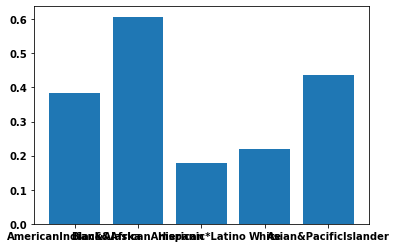

In [127]:
plt.bar(participation_adjusted.keys(),participation_adjusted.values())